Step 1: Import the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

step 2: Load the data

In [5]:
tweets_train = pd.read_csv("C:\\Users\\ANJALI\\Downloads\\twitter_training.csv\\twitter_training.csv")
tweets_train.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


Insert name for each column

In [8]:
column_name=['tweetID','entity','sentiment','tweet_content']
tweets_train.columns=column_name
tweets=pd.concat([tweets_train],ignore_index=False)
tweets.head()

,tweetID,entity,sentiment,tweet_content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [9]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweetID        74681 non-null  int64 
 1   entity         74681 non-null  object
 2   sentiment      74681 non-null  object
 3   tweet_content  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


Step 3: Data Cleaning

In [11]:
tweets.isnull().sum()

tweetID            0
entity             0
sentiment          0
tweet_content    686
dtype: int64

In [12]:
tweets.duplicated().sum()

2700

In [13]:
##dropping null and duplicate values
tweets.dropna(inplace=True)
tweets.drop_duplicates(inplace=True)

In [14]:
##dropping the columns that are not useful
tweets.drop(columns=['tweetID','tweet_content'],inplace=True)
tweets.head()

,entity,sentiment
0,Borderlands,Positive
1,Borderlands,Positive
2,Borderlands,Positive
3,Borderlands,Positive
4,Borderlands,Positive


Step 4: Data Visualization

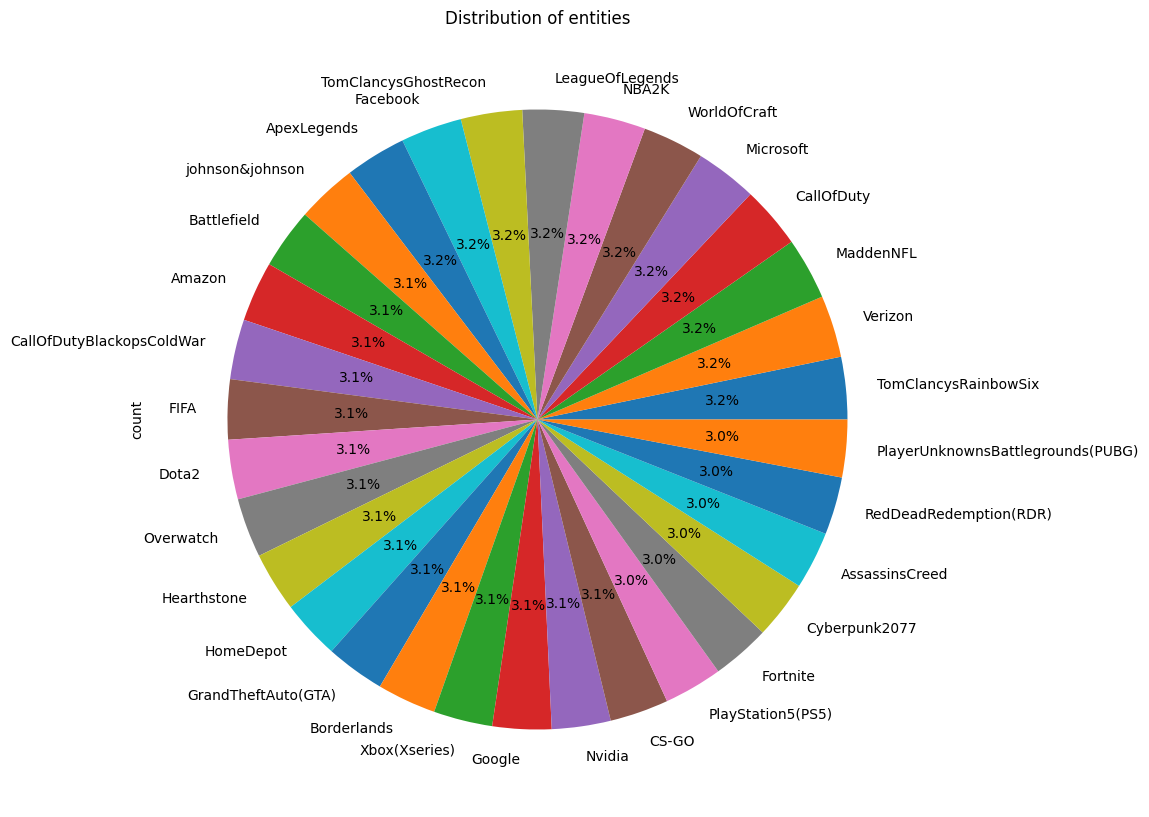

In [15]:
entity_content=tweets['entity'].value_counts()
entity_content.plot(kind='pie', autopct='%1.1f%%', figsize=(10, 12))
plt.title('Distribution of entities')

plt.show()

<Axes: xlabel='sentiment'>

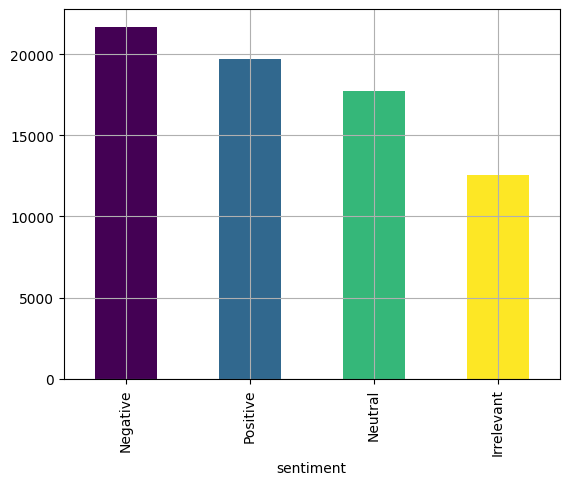

In [16]:
sentiment_content=tweets['sentiment'].value_counts()
color=plt.get_cmap('viridis')
colors = [color(i) for i in np.linspace(0, 1, len(sentiment_content))]
sentiment_content.plot(kind='bar',color=colors,grid=True)

<Axes: xlabel='entity'>

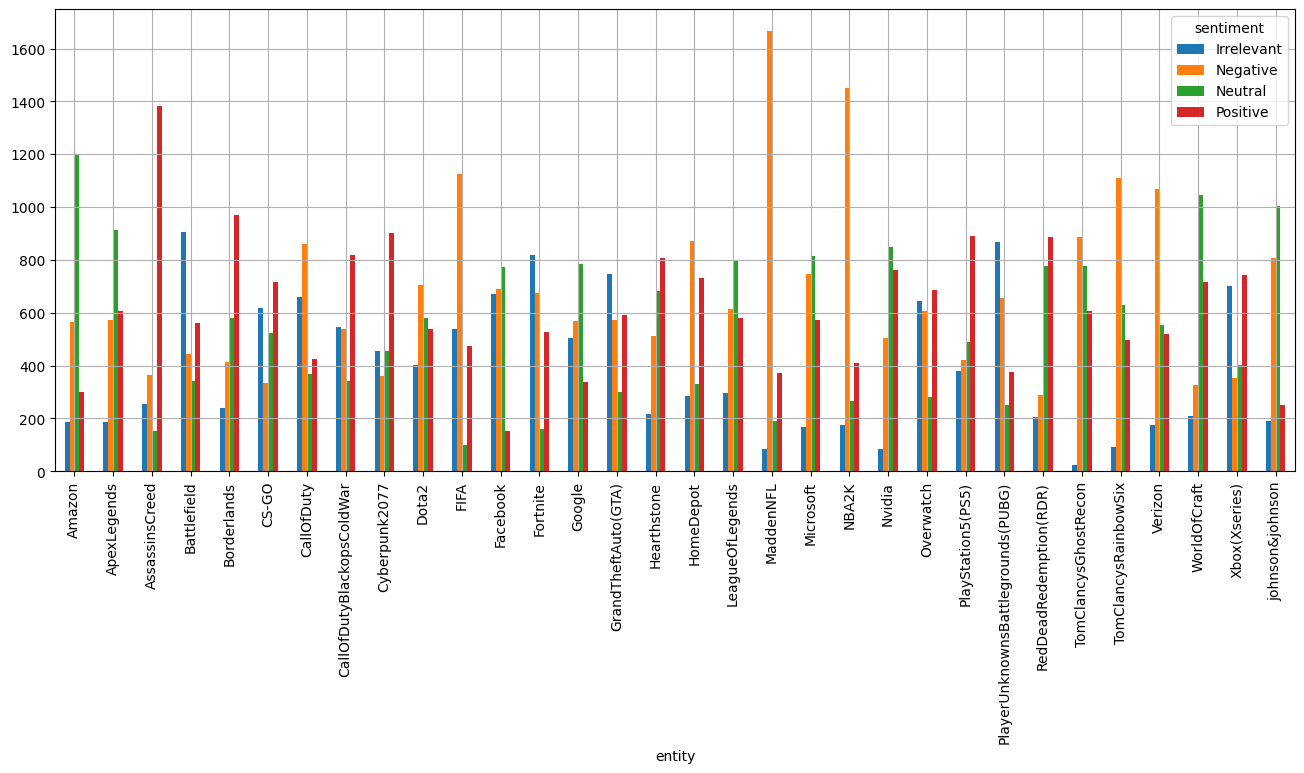

In [17]:
reactions_entities = pd.crosstab(tweets['entity'],tweets['sentiment'])
reactions_entities.plot(kind='bar', figsize=(16, 6),grid=True)